In [339]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [340]:
import numpy as np
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

%tensorflow_version 1.0.0
import tensorflow as tf
print(tf.__version__)

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.0.0`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
1.15.2


In [341]:
print("TensorFlow Version: %s" % tf.__version__)

TensorFlow Version: 1.15.2


In [342]:
import numpy as np
import tensorflow as tf
import math
import logging
logging.basicConfig(level=logging.DEBUG)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [343]:
#Network parameters
n_hidden1 = 10
n_hidden2 = 10
n_input = 10
n_output = 1
#Learning parameters
learning_constant = 0.0001
number_epochs = 5000
batch_size = 1000

In [344]:
#Defining the input and the output
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
#DEFINING WEIGHTS AND BIASES
#Biases first hidden layer
b1 = tf.Variable(tf.random_normal([n_hidden1]))
#Biases second hidden layer
b2 = tf.Variable(tf.random_normal([n_hidden2]))
#Biases output layer
b3 = tf.Variable(tf.random_normal([n_output]))
#Weights connecting input layer with first hidden layer
w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))
#Weights connecting first hidden layer with second hidden layer
w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2]))
#Weights connecting second hidden layer with output layer
w3 = tf.Variable(tf.random_normal([n_hidden2, n_output]))

In [345]:
def multilayer_perceptron(input_d):
  #Task of neurons of first hidden layer
  layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(input_d, w1), b1))
  #Task of neurons of second hidden layer
  layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2), b2))
  #Task of neurons of output layer
  out_layer = tf.add(tf.matmul(layer_2, w3),b3)
  return out_layer

In [346]:
#Create model
neural_network = multilayer_perceptron(X)

In [347]:
#Define loss and optimizer
loss_op = tf.reduce_mean(tf.math.squared_difference(neural_network,Y))
#loss_op =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network,labels=Y))
optimizer= tf.train.GradientDescentOptimizer(learning_constant).minimize(loss_op)

In [348]:
#Initializing the variables
init = tf.global_variables_initializer()

In [349]:
import numpy as np
import pandas as pd
import datetime

def PM2Dot5():
    path = '/content/drive/My Drive/Colab Notebooks/ML/PRSA_data_2010.1.1-2014.12.31.csv'
    # names = ['No','year','month','day','hour','pm2.5','DEWP','TEMP','PRES','cbwd','Iws','Is','Ir']
    df = pd.read_csv(path,index_col=False)

    # drop the rows directly -> mess up the order
    # first 24 rows have pm2.5 value that is NaN -> discard
    # else: forward filling
    df = df[24:].fillna(method='ffill')

    df['time'] = df.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)
    df.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)
    df = df.set_index('time')

    # one-hot encoding for attribute cbwd
    df = df.join(pd.get_dummies(df['cbwd']))
    del df['cbwd']


    X = df.iloc[:,1:].astype(np.float64)
    y = df['pm2.5'].astype(np.float64)

    return X, y.to_frame()



In [350]:
X_source,y_source = PM2Dot5()

X_train, X_test, y_train, y_test = train_test_split(X_source.values, y_source.values, test_size=0.4,shuffle=True)

In [351]:
y_train

array([[  9.],
       [126.],
       [ 19.],
       ...,
       [172.],
       [ 16.],
       [  7.]])

In [352]:
## load MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train.astype(np.float64))
y_train= scaler.fit_transform(y_train.astype(np.float64))

Epoch: 0   Loss = 5.297152
Epoch: 100   Loss = 3.85471
Epoch: 200   Loss = 2.8112056
Epoch: 300   Loss = 2.0584981
Epoch: 400   Loss = 1.5168878
Epoch: 500   Loss = 1.1279211
Epoch: 600   Loss = 0.8489606
Epoch: 700   Loss = 0.6490551
Epoch: 800   Loss = 0.5058381
Epoch: 900   Loss = 0.40319955
Epoch: 1000   Loss = 0.3295668
Epoch: 1100   Loss = 0.27664894
Epoch: 1200   Loss = 0.23851445
Epoch: 1300   Loss = 0.21092397
Epoch: 1400   Loss = 0.19085275
Epoch: 1500   Loss = 0.17614286
Epoch: 1600   Loss = 0.16525677
Epoch: 1700   Loss = 0.15709782
Epoch: 1800   Loss = 0.1508862
Epoch: 1900   Loss = 0.1460652
Epoch: 2000   Loss = 0.14223997
Epoch: 2100   Loss = 0.13912839
Epoch: 2200   Loss = 0.13652946
Epoch: 2300   Loss = 0.13430008
Epoch: 2400   Loss = 0.13233948
Epoch: 2500   Loss = 0.13057442
Epoch: 2600   Loss = 0.12895365
Epoch: 2700   Loss = 0.12743989
Epoch: 2800   Loss = 0.12600711
Epoch: 2900   Loss = 0.12463704
Epoch: 3000   Loss = 0.12331592
Epoch: 3100   Loss = 0.12203403
Epo

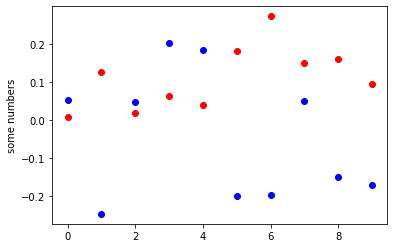

In [353]:
with tf.Session() as sess:
  start_time = time.clock()
  sess.run(init)
  #Training epoch
  for epoch in range(number_epochs):
    sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
    #Display the epoch
    if epoch % 100 == 0:
      print("Epoch:", '%d' % (epoch),' ','Loss = ' + str(sess.run(loss_op, feed_dict={X: X_train, Y: y_train})))
      # print("Epoch:", '%d' % (epoch))
      # print('Loss = ' + str(sess.run(loss_op, feed_dict={X: X_train, Y: y_train})))

  end_time = time.clock()
  # Test model
  pred = (neural_network) # Apply softmax to logits
  accuracy=tf.keras.losses.MSE(pred,Y)
  print("Accuracy:", accuracy.eval({X: X_train, Y:y_train}))

  print("Prediction:", pred.eval({X: X_train}))

  print("Training time:",'%d' % (end_time-start_time))
  output=neural_network.eval({X: X_train})
  plt.plot(y_train[0:10], 'ro', output[0:10], 'bo')
  plt.ylabel('some numbers')
  plt.show()
 